## 1. Problem Statement

We have the dataset of 1000 popular movies on IMDB in the last 10 years ie, 2006-2016.

This Exploratory Data Analysis is to practice Python skills learned till now on a structured data set including loading, inspecting, wrangling, exploring, and drawing conclusions from data.

## 2. Data Loading and Description

This dataset includes 1000 observations of 12 columns. The data fields included are:

| Column Name         | Description                                                                              |
| -------------       |:-------------                                                                           :| 
| Rank                | Movie rank order                                                                         | 
| Title               | The title of the film                                                                    |  
| Genre               | A comma-separated list of genres used to classify the film                               | 
| Description         | Brief one-sentence movie summary                                                         |   
| Director            | The name of the film's director                                                          |
| Actors              | A comma-separated list of the main stars of the film                                     |
| Year                | The year that the film released as an integer.                                           |
| Runtime (Minutes)   | The duration of the film in minutes                                                      |
| Rating              | User rating for the movie 0-10                                                           |
| Votes               | Number of votes                                                                          |
| Revenue (Millions)  | Movie revenue in millions                                                                |
| Metascore           | An aggregated average of critic scores (0-100), higher scores represent positive reviews |

#### Importing Packages

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline 
sns.set()

from subprocess import check_output

#### Importing the dataset

In [2]:
movie_data = pd.read_csv("1000 movies data.csv")

In [3]:
movie_data.head()

,Rank,Title,Genre,Description,Director,Actors,Year,Runtime (Minutes),Rating,Votes,Revenue (Millions),Metascore
0,1,Guardians of the Galaxy,"Action,Adventure,Sci-Fi",A group of intergalactic criminals are forced ...,James Gunn,"Chris Pratt, Vin Diesel, Bradley Cooper, Zoe S...",2014,121,8.1,757074,333.13,76.0
1,2,Prometheus,"Adventure,Mystery,Sci-Fi","Following clues to the origin of mankind, a te...",Ridley Scott,"Noomi Rapace, Logan Marshall-Green, Michael Fa...",2012,124,7.0,485820,126.46,65.0
2,3,Split,"Horror,Thriller",Three girls are kidnapped by a man with a diag...,M. Night Shyamalan,"James McAvoy, Anya Taylor-Joy, Haley Lu Richar...",2016,117,7.3,157606,138.12,62.0
3,4,Sing,"Animation,Comedy,Family","In a city of humanoid animals, a hustling thea...",Christophe Lourdelet,"Matthew McConaughey,Reese Witherspoon, Seth Ma...",2016,108,7.2,60545,270.32,59.0
4,5,Suicide Squad,"Action,Adventure,Fantasy",A secret government agency recruits some of th...,David Ayer,"Will Smith, Jared Leto, Margot Robbie, Viola D...",2016,123,6.2,393727,325.02,40.0


## 3. Data Profiling

#### Understanding the DataSet

In [4]:
movie_data.shape

(1000, 12)

In [5]:
movie_data.isna().sum()

Rank                    0
Title                   0
Genre                   0
Description             0
Director                0
Actors                  0
Year                    0
Runtime (Minutes)       0
Rating                  0
Votes                   0
Revenue (Millions)    128
Metascore              64
dtype: int64

In [6]:
movie_data.describe()

,Rank,Year,Runtime (Minutes),Rating,Votes,Revenue (Millions),Metascore
count,1000.000000,1000.000000,1000.000000,1000.000000,1.000000e+03,872.000000,936.000000
mean,500.500000,2012.783000,113.172000,6.723200,1.698083e+05,82.956376,58.985043
std,288.819436,3.205962,18.810908,0.945429,1.887626e+05,103.253540,17.194757
min,1.000000,2006.000000,66.000000,1.900000,6.100000e+01,0.000000,11.000000
25%,250.750000,2010.000000,100.000000,6.200000,3.630900e+04,13.270000,47.000000
50%,500.500000,2014.000000,111.000000,6.800000,1.107990e+05,47.985000,59.500000
75%,750.250000,2016.000000,123.000000,7.400000,2.399098e+05,113.715000,72.000000
max,1000.000000,2016.000000,191.000000,9.000000,1.791916e+06,936.630000,100.000000


In [7]:
movie_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 12 columns):
Rank                  1000 non-null int64
Title                 1000 non-null object
Genre                 1000 non-null object
Description           1000 non-null object
Director              1000 non-null object
Actors                1000 non-null object
Year                  1000 non-null int64
Runtime (Minutes)     1000 non-null int64
Rating                1000 non-null float64
Votes                 1000 non-null int64
Revenue (Millions)    872 non-null float64
Metascore             936 non-null float64
dtypes: float64(3), int64(4), object(5)
memory usage: 93.8+ KB


From above, we can see that __Metascore__ and __Revenue (Millions)__ column contain maximum null values. We will need to find proper value to replace nulls. As both these columns solely depends on movies performance and viewer's choice. 

However, __Metascore__ is also a movie rating by critics. We can find how related critics ratings are to audience rating (Rating) and try replace __Metascore__ null values with appropriate values.

The datatypes of columns are okay as number(Integer/Float) columns as of Int type and other are object, which can be converted to categories. 

### Pre-Profiling

In [8]:
import pandas_profiling
profile = pandas_profiling.ProfileReport(movie_data)
profile.to_file(outputfile="movie_data_preprocessing.html")

### Pre-Processing

Handling missing data:
1. For missing Metascore values, since it is related to Rating we can replace missing Metascore values with Rating*10 values
2. For Revenue (Millions) missing values, we can

In [9]:
movie_data.Metascore.fillna(movie_data.Rating*10,inplace=True)

In [10]:
print(movie_data.Genre.unique().shape)
print(movie_data.Director.unique().shape)
print(movie_data["Runtime (Minutes)"].unique().shape)

(207,)
(644,)
(94,)


There are 207 unique Genres but this number is due to combinations of genres. Let us split this and get unique genre as the first mentioned Genre is the major genre the film belongs to.

Out of 1000 movies, there are 644 distinct Directors. So there are directors with repeated movies, we will see how were they rated and did some directors had multiple high rated movies.

#### Adding new columns to simplify data

In [11]:
movie_data[['Genre1','Genre2','Genre3']] = movie_data.Genre.str.split(",",expand=True,)

Lets fill the null values in Genre2 and Genre3 with Genre1 value

In [12]:
movie_data["Genre2"].fillna(movie_data.Genre1,inplace=True)

In [13]:
movie_data["Genre3"].fillna(movie_data.Genre2,inplace=True)

In [14]:
print(movie_data.Genre1.unique().shape)
print(movie_data.Genre2.unique().shape)
print(movie_data.Genre3.unique().shape)

(13,)
(19,)
(19,)


#### Hence, there are 19 unique Genre of movies
Let us create a new column of Avg Rating based on rating and Metascore.

In [15]:
movie_data["Avg_Rating"] = (movie_data["Rating"]+movie_data["Metascore"]/10)/2

#### Creating new columns __Vote_Groups__ and __Revenue_Group__ to analyse the trend and relation between data better

In [16]:
print(movie_data.Votes.min())
print(movie_data.Votes.max())

movie_data[movie_data.Votes>1000000].Votes.count()

61
1791916


6

In [17]:
movie_data["Vote_Groups"] = pd.cut(movie_data["Votes"],
                                 [0,250000,500000,750000,1000000,1250000,1500000,1800000],
                                 labels=['0-25','25-50','50-75','75-100','100-125','125-150','150+'],include_lowest=True)

In [18]:
movie_data["Rate_Group"] = pd.cut(movie_data["Rating"],
                                 [0,2,4,6,8,10],
                                 labels=['0-2','2-4','4-6','6-8','8-10'],include_lowest=True)

In [19]:
print(movie_data["Revenue (Millions)"].max())
print(movie_data["Revenue (Millions)"].min())
movie_data["Revenue_Group"] = pd.cut(movie_data["Revenue (Millions)"].dropna(),
                                     [0,200,400,600,800,1000],
                                     labels=['0-200','200-400','400-600','600-800','800+'],include_lowest=True)

936.63
0.0


#### Replace Null values of column "Revenue (Millions)"

In [20]:
movie_data_na = movie_data[(movie_data["Revenue (Millions)"].isna())]
movie_data.groupby(["Genre1"]).min() # Action minimum revenue is 0.03 and adventure is 0.06ta["Revenue (Millions)"].isna())]

,Rank,Title,Genre,Description,Director,Actors,Year,Runtime (Minutes),Rating,Votes,Revenue (Millions),Metascore,Genre2,Genre3,Avg_Rating,Vote_Groups,Rate_Group,Revenue_Group
Genre1,,,,,,,,,,,,,,,,,,
Action,1,13 Hours,Action,#1 NASCAR driver Ricky Bobby stays atop the he...,Adam McKay,"Aamir Khan, Sakshi Tanwar, Fatima Sana Shaikh,...",2006,81,2.7,223,0.03,20.0,Action,Action,3.10,0-25,2-4,NaN
Adventure,2,127 Hours,Adventure,12-year-old orphan Peter is spirited away to t...,Alejandro González Iñárritu,"Adam Pally, T.J. Miller, Thomas Middleditch,Sh...",2006,80,4.9,1810,0.06,22.0,Adventure,Adventure,3.90,0-25,4-6,NaN
Animation,4,Angry Birds,"Animation,Action,Adventure",A hapless young Viking who aspires to hunt dra...,Alessandro Carloni,"Adam Sandler, Andy Samberg, Selena Gomez, Kevi...",2006,66,5.7,1109,0.29,34.0,Action,Adventure,4.55,0-25,4-6,NaN
Biography,12,12 Years a Slave,"Biography,Comedy,Crime",A U.S. Customs official uncovers a money laund...,Adam McKay,"Andrew Garfield, Sam Worthington, Luke Bracey,...",2006,96,5.0,346,0.04,42.0,Comedy,Crime,5.15,0-25,4-6,NaN
Comedy,7,(500) Days of Summer,Comedy,"""Mr. Church"" tells the story of a unique frien...",Adam Leon,"Aamir Khan, Anushka Sharma, Sanjay Dutt,Boman ...",2006,81,1.9,102,0.01,11.0,Comedy,Comedy,1.70,0-25,0-2,NaN
Crime,23,21,"Crime,Drama","""21"" is the fact-based story about six MIT stu...",Afonso Poyart,"Aaron Taylor-Johnson, Taylor Kitsch, Blake Liv...",2006,87,3.5,198,0.00,23.0,Drama,Drama,3.25,0-25,2-4,NaN
Drama,20,10 Cloverfield Lane,Drama,19-year-old Billy Lynn is brought home for a v...,Aamir Khan,"Abbie Cornish, Dermot Mulroney, Justin Long,Di...",2006,83,3.7,61,0.01,16.0,Drama,Drama,2.65,0-25,2-4,NaN
Fantasy,562,1408,"Fantasy,Horror",A challenged man is stalked by tall phantoms i...,Christopher Smith,"Dan Crisafulli, Kay Whitney, Richard Garcia, P...",2007,91,3.2,173,54.24,57.0,Horror,Horror,4.45,0-25,2-4,NaN
Horror,3,31,Horror,A corporate risk-management consultant must de...,Adam Wingard,"Aaron Poole, Kenneth Welsh,Daniel Fathers, Kat...",2006,73,2.7,240,0.01,25.0,Horror,Horror,2.70,0-25,2-4,NaN


In [21]:
movie_data_na.groupby(["Genre1"]).count()

,Rank,Title,Genre,Description,Director,Actors,Year,Runtime (Minutes),Rating,Votes,Revenue (Millions),Metascore,Genre2,Genre3,Avg_Rating,Vote_Groups,Rate_Group,Revenue_Group
Genre1,,,,,,,,,,,,,,,,,,
Action,17,17,17,17,17,17,17,17,17,17,0,17,17,17,17,17,17,0
Adventure,4,4,4,4,4,4,4,4,4,4,0,4,4,4,4,4,4,0
Animation,2,2,2,2,2,2,2,2,2,2,0,2,2,2,2,2,2,0
Biography,4,4,4,4,4,4,4,4,4,4,0,4,4,4,4,4,4,0
Comedy,19,19,19,19,19,19,19,19,19,19,0,19,19,19,19,19,19,0
Crime,17,17,17,17,17,17,17,17,17,17,0,17,17,17,17,17,17,0
Drama,39,39,39,39,39,39,39,39,39,39,0,39,39,39,39,39,39,0
Fantasy,2,2,2,2,2,2,2,2,2,2,0,2,2,2,2,2,2,0
Horror,11,11,11,11,11,11,11,11,11,11,0,11,11,11,11,11,11,0


In [22]:
print(movie_data[movie_data.Genre2 =="Action"].shape) #["Revenue (Millions)"]  
movie_data.groupby(["Genre1"]).min() # Action minimum revenue is 0.03 and adventure is 0.06

(12, 19)


,Rank,Title,Genre,Description,Director,Actors,Year,Runtime (Minutes),Rating,Votes,Revenue (Millions),Metascore,Genre2,Genre3,Avg_Rating,Vote_Groups,Rate_Group,Revenue_Group
Genre1,,,,,,,,,,,,,,,,,,
Action,1,13 Hours,Action,#1 NASCAR driver Ricky Bobby stays atop the he...,Adam McKay,"Aamir Khan, Sakshi Tanwar, Fatima Sana Shaikh,...",2006,81,2.7,223,0.03,20.0,Action,Action,3.10,0-25,2-4,NaN
Adventure,2,127 Hours,Adventure,12-year-old orphan Peter is spirited away to t...,Alejandro González Iñárritu,"Adam Pally, T.J. Miller, Thomas Middleditch,Sh...",2006,80,4.9,1810,0.06,22.0,Adventure,Adventure,3.90,0-25,4-6,NaN
Animation,4,Angry Birds,"Animation,Action,Adventure",A hapless young Viking who aspires to hunt dra...,Alessandro Carloni,"Adam Sandler, Andy Samberg, Selena Gomez, Kevi...",2006,66,5.7,1109,0.29,34.0,Action,Adventure,4.55,0-25,4-6,NaN
Biography,12,12 Years a Slave,"Biography,Comedy,Crime",A U.S. Customs official uncovers a money laund...,Adam McKay,"Andrew Garfield, Sam Worthington, Luke Bracey,...",2006,96,5.0,346,0.04,42.0,Comedy,Crime,5.15,0-25,4-6,NaN
Comedy,7,(500) Days of Summer,Comedy,"""Mr. Church"" tells the story of a unique frien...",Adam Leon,"Aamir Khan, Anushka Sharma, Sanjay Dutt,Boman ...",2006,81,1.9,102,0.01,11.0,Comedy,Comedy,1.70,0-25,0-2,NaN
Crime,23,21,"Crime,Drama","""21"" is the fact-based story about six MIT stu...",Afonso Poyart,"Aaron Taylor-Johnson, Taylor Kitsch, Blake Liv...",2006,87,3.5,198,0.00,23.0,Drama,Drama,3.25,0-25,2-4,NaN
Drama,20,10 Cloverfield Lane,Drama,19-year-old Billy Lynn is brought home for a v...,Aamir Khan,"Abbie Cornish, Dermot Mulroney, Justin Long,Di...",2006,83,3.7,61,0.01,16.0,Drama,Drama,2.65,0-25,2-4,NaN
Fantasy,562,1408,"Fantasy,Horror",A challenged man is stalked by tall phantoms i...,Christopher Smith,"Dan Crisafulli, Kay Whitney, Richard Garcia, P...",2007,91,3.2,173,54.24,57.0,Horror,Horror,4.45,0-25,2-4,NaN
Horror,3,31,Horror,A corporate risk-management consultant must de...,Adam Wingard,"Aaron Poole, Kenneth Welsh,Daniel Fathers, Kat...",2006,73,2.7,240,0.01,25.0,Horror,Horror,2.70,0-25,2-4,NaN


In [23]:
movie_data.groupby(["Genre1"]).max()  # Maximum revenue for action and adventure is 936.63 and 408

,Rank,Title,Genre,Description,Director,Actors,Year,Runtime (Minutes),Rating,Votes,Revenue (Millions),Metascore,Genre2,Genre3,Avg_Rating,Vote_Groups,Rate_Group,Revenue_Group
Genre1,,,,,,,,,,,,,,,,,,
Action,994,You Don't Mess with the Zohan,"Action,Thriller,War","Young, up-and-coming martial artist, Bruce Lee...",Zack Snyder,"Zoey Deutch, Lucy Fry, Danila Kozlovsky, Gabri...",2016,191,9.0,1791916,936.63,90.0,Thriller,Western,8.80,150+,8-10,800+
Adventure,999,Zombieland,"Adventure,Sci-Fi,Thriller",With their warning about Lord Voldemort's retu...,Wes Anderson,"Zac Efron, Adam Devine, Anna Kendrick, Aubrey ...",2016,169,8.6,1047747,408.00,88.0,Sci-Fi,Western,8.45,100-125,8-10,400-600
Animation,904,Zootopia,"Animation,Fantasy",When the newly crowned Queen Elsa accidentally...,Wes Anderson,"Will Ferrell, Jonah Hill, Brad Pitt, Tina Fey",2016,129,8.6,776897,486.29,96.0,Fantasy,Romance,8.80,75-100,8-10,400-600
Biography,990,Woman in Gold,"Biography,History,Thriller","WWII American Army Medic Desmond T. Doss, who ...",Tom Hooper,"Will Smith, Thandie Newton, Jaden Smith, Brian...",2016,180,8.6,865134,255.95,96.0,History,Thriller,8.85,75-100,8-10,200-400
Comedy,1000,Zoolander 2,"Comedy,Western","While wrestling with the pressures of life, lo...",Yorgos Lanthimos,"Zooey Deschanel, Joseph Gordon-Levitt, Geoffre...",2016,170,8.4,611563,277.31,93.0,Western,Western,8.80,50-75,8-10,200-400
Crime,996,Zodiac,"Crime,Thriller",With the help of his new friends Alex Danyliuk...,Zackary Adler,"William Atherton, Blythe Auffarth, Blanche Bak...",2016,187,8.5,937414,167.74,93.0,Thriller,Thriller,8.70,75-100,8-10,0-200
Drama,998,Zipper,"Drama,Western",Years after a plague kills most of humanity an...,Yorgos Lanthimos,"Zac Efron, Wes Bentley, Emily Ratajkowski, Jon...",2016,180,8.5,1039115,274.08,100.0,Western,Western,9.00,100-125,8-10,200-400
Fantasy,946,Triangle,"Fantasy,Mystery,Thriller",The story revolves around the passengers of a ...,Mikael Håfström,"Melissa George, Joshua McIvor, Jack Taylor,Mic...",2016,133,6.9,221073,71.98,66.0,Mystery,Thriller,6.75,0-25,6-8,0-200
Horror,997,Wolves at the Door,"Horror,Thriller",When aspiring model Jesse moves to Los Angeles...,William Brent Bell,"Ward Horton, Annabelle Wallis, Alfre Woodard,T...",2016,134,7.5,330305,138.12,89.0,Thriller,Thriller,8.00,25-50,6-8,0-200


#### The Genre of film in missing revenue set are mainly Action,Comedy, Crime, Drama,Horror and Adventure. These films have large range of Revenue generated for non-missing data. We cannot conculde average Revenue for missing data on basis of Genre average Revenue. 

In [24]:
movie_data_na[movie_data_na.Genre1=='Action'][movie_data.Rate_Group=='6-8']

F:\Softwares\Anaconda\lib\site-packages\ipykernel_launcher.py:1: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  """Entry point for launching an IPython kernel.


,Rank,Title,Genre,Description,Director,Actors,Year,Runtime (Minutes),Rating,Votes,Revenue (Millions),Metascore,Genre1,Genre2,Genre3,Avg_Rating,Vote_Groups,Rate_Group,Revenue_Group
123,124,Boyka: Undisputed IV,Action,In the fourth installment of the fighting fran...,Todor Chapkanov,"Scott Adkins, Teodora Duhovnikova, Alon Aboutb...",2016,86,7.4,10428,NaN,74.0,Action,Action,Action,7.4,0-25,6-8,NaN
434,435,Let Me Make You a Martyr,"Action,Crime,Drama",A cerebral revenge film about two adopted sibl...,Corey Asraf,"Marilyn Manson, Mark Boone Junior, Sam Quartin...",2016,102,6.4,223,NaN,56.0,Action,Crime,Drama,6.0,0-25,6-8,NaN
526,527,Elysium,"Action,Drama,Sci-Fi","In the year 2154, the very wealthy live on a m...",Neill Blomkamp,"Matt Damon, Jodie Foster, Sharlto Copley, Alic...",2013,109,6.6,358932,NaN,66.0,Action,Drama,Sci-Fi,6.6,25-50,6-8,NaN
532,533,Deja Vu,"Action,Sci-Fi,Thriller","After a ferry is bombed in New Orleans, an A.T...",Tony Scott,"Denzel Washington, Paula Patton, Jim Caviezel,...",2006,126,7.0,253858,NaN,70.0,Action,Sci-Fi,Thriller,7.0,25-50,6-8,NaN
542,543,Spectral,"Action,Mystery,Sci-Fi",A sci-fi/thriller story centered on a special-...,Nic Mathieu,"James Badge Dale, Emily Mortimer, Bruce Greenw...",2016,107,6.3,27042,NaN,39.0,Action,Mystery,Sci-Fi,5.1,0-25,6-8,NaN
617,618,Free State of Jones,"Action,Biography,Drama",A disillusioned Confederate army deserter retu...,Gary Ross,"Matthew McConaughey, Gugu Mbatha-Raw, Mahersha...",2016,139,6.9,29895,NaN,69.0,Action,Biography,Drama,6.9,0-25,6-8,NaN
895,896,Planet Terror,"Action,Comedy,Horror","After an experimental bio-weapon is released, ...",Robert Rodriguez,"Rose McGowan, Freddy Rodríguez, Josh Brolin,Ma...",2007,105,7.1,174553,NaN,55.0,Action,Comedy,Horror,6.3,0-25,6-8,NaN
938,939,The Siege of Jadotville,"Action,Drama,Thriller",Irish Commandant Pat Quinlan leads a stand off...,Richie Smyth,"Jamie Dornan, Mark Strong, Jason O'Mara, Micha...",2016,108,7.3,14689,NaN,83.0,Action,Drama,Thriller,7.8,0-25,6-8,NaN


In [25]:
movie_data[movie_data.Rate_Group=='6-8'][movie_data.Vote_Groups=="0-25"][movie_data.Genre1=="Action"]

F:\Softwares\Anaconda\lib\site-packages\ipykernel_launcher.py:1: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  """Entry point for launching an IPython kernel.
F:\Softwares\Anaconda\lib\site-packages\ipykernel_launcher.py:1: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  """Entry point for launching an IPython kernel.


,Rank,Title,Genre,Description,Director,Actors,Year,Runtime (Minutes),Rating,Votes,Revenue (Millions),Metascore,Genre1,Genre2,Genre3,Avg_Rating,Vote_Groups,Rate_Group,Revenue_Group
5,6,The Great Wall,"Action,Adventure,Fantasy",European mercenaries searching for black powde...,Yimou Zhang,"Matt Damon, Tian Jing, Willem Dafoe, Andy Lau",2016,103,6.1,56036,45.13,42.0,Action,Adventure,Fantasy,5.15,0-25,6-8,0-200
8,9,The Lost City of Z,"Action,Adventure,Biography","A true-life drama, centering on British explor...",James Gray,"Charlie Hunnam, Robert Pattinson, Sienna Mille...",2016,141,7.1,7188,8.01,78.0,Action,Adventure,Biography,7.45,0-25,6-8,0-200
14,15,Colossal,"Action,Comedy,Drama",Gloria is an out-of-work party girl forced to ...,Nacho Vigalondo,"Anne Hathaway, Jason Sudeikis, Austin Stowell,...",2016,109,6.4,8612,2.87,70.0,Action,Comedy,Drama,6.70,0-25,6-8,0-200
17,18,Jason Bourne,"Action,Thriller",The CIA's most dangerous former operative is d...,Paul Greengrass,"Matt Damon, Tommy Lee Jones, Alicia Vikander,V...",2016,123,6.7,150823,162.16,58.0,Action,Thriller,Thriller,6.25,0-25,6-8,0-200
38,39,The Magnificent Seven,"Action,Adventure,Western",Seven gunmen in the old west gradually come to...,Antoine Fuqua,"Denzel Washington, Chris Pratt, Ethan Hawke,Vi...",2016,132,6.9,122853,93.38,54.0,Action,Adventure,Western,6.15,0-25,6-8,0-200
48,49,Star Trek Beyond,"Action,Adventure,Sci-Fi",The USS Enterprise crew explores the furthest ...,Justin Lin,"Chris Pine, Zachary Quinto, Karl Urban, Zoe Sa...",2016,122,7.1,164567,158.80,68.0,Action,Adventure,Sci-Fi,6.95,0-25,6-8,0-200
69,70,Deepwater Horizon,"Action,Drama,Thriller","A dramatization of the April 2010 disaster, wh...",Peter Berg,"Mark Wahlberg, Kurt Russell, Douglas M. Griffi...",2016,107,7.2,89849,61.28,68.0,Action,Drama,Thriller,7.00,0-25,6-8,0-200
71,72,Allied,"Action,Drama,Romance","In 1942, a Canadian intelligence officer in No...",Robert Zemeckis,"Brad Pitt, Marion Cotillard, Jared Harris, Vin...",2016,124,7.1,78079,40.07,60.0,Action,Drama,Romance,6.55,0-25,6-8,0-200
89,90,The Accountant,"Action,Crime,Drama",As a math savant uncooks the books for a new c...,Gavin O'Connor,"Ben Affleck, Anna Kendrick, J.K. Simmons, Jon ...",2016,128,7.4,162122,86.20,51.0,Action,Crime,Drama,6.25,0-25,6-8,0-200
91,92,Warcraft,"Action,Adventure,Fantasy",As an Orc horde invades the planet Azeroth usi...,Duncan Jones,"Travis Fimmel, Paula Patton, Ben Foster, Domin...",2016,123,7.0,187547,47.17,32.0,Action,Adventure,Fantasy,5.10,0-25,6-8,0-200


#### Even after filtering on basis of Vote_group , Rate_group and Genre1 of the movie the Revenue still have a large range (8 to 200 Millions ). So we will be leaving the NaN values as such and continue with EDA

In [26]:
movie_data.groupby(["Genre1","Rate_Group"]).count()

Rank  Title  Genre  Description  Director  Actors  \
Genre1    Rate_Group                                                       
Action    0-2           NaN    NaN    NaN          NaN       NaN     NaN   
          2-4           3.0    3.0    3.0          3.0       3.0     3.0   
          4-6          71.0   71.0   71.0         71.0      71.0    71.0   
          6-8         207.0  207.0  207.0        207.0     207.0   207.0   
          8-10         12.0   12.0   12.0         12.0      12.0    12.0   
Adventure 0-2           NaN    NaN    NaN          NaN       NaN     NaN   
          2-4           NaN    NaN    NaN          NaN       NaN     NaN   
          4-6          13.0   13.0   13.0         13.0      13.0    13.0   
          6-8          57.0   57.0   57.0         57.0      57.0    57.0   
          8-10          5.0    5.0    5.0          5.0       5.0     5.0   
Animation 0-2           NaN    NaN    NaN          NaN       NaN     NaN   
          2-4           NaN    NaN    NaN          NaN       NaN     NaN   
          4-6           2.0    2.0    2.0          2.0       2.0     2.0   
          6-8          39.0   39.0   39.0         39.0      39.0    39.0   
          8-10          8.0    8.0    8.0          8.0       8.0     8.0   
Biography 0-2           NaN    NaN    NaN          NaN       NaN     NaN   
          2-4           NaN    NaN    NaN          NaN       NaN     NaN   
          4-6           1.0    1.0    1.0          1.0       1.0     1.0   
          6-8          57.0   57.0   57.0         57.0      57.0    57.0   
          8-10          6.0    6.0    6.0          6.0       6.0     6.0   
Comedy    0-2           1.0    1.0    1.0          1.0       1.0     1.0   
          2-4           NaN    NaN    NaN          NaN       NaN     NaN   
          4-6          43.0   43.0   43.0         43.0      43.0    43.0   
          6-8         127.0  127.0  127.0        127.0     127.0   127.0   
          8-10          4.0    4.0    4.0          4.0       4.0     4.0   
Crime     0-2           NaN    NaN    NaN          NaN       NaN     NaN   
          2-4           1.0    1.0    1.0          1.0       1.0     1.0   
          4-6          12.0   12.0   12.0         12.0      12.0    12.0   
          6-8          53.0   53.0   53.0         53.0      53.0    53.0   
          8-10          5.0    5.0    5.0          5.0       5.0     5.0   
...                     ...    ...    ...          ...       ...     ...   
Fantasy   0-2           NaN    NaN    NaN          NaN       NaN     NaN   
          2-4           1.0    1.0    1.0          1.0       1.0     1.0   
          4-6           NaN    NaN    NaN          NaN       NaN     NaN   
          6-8           3.0    3.0    3.0          3.0       3.0     3.0   
          8-10          NaN    NaN    NaN          NaN       NaN     NaN   
Horror    0-2           NaN    NaN    NaN          NaN       NaN     NaN   
          2-4           3.0    3.0    3.0          3.0       3.0     3.0   
          4-6          21.0   21.0   21.0         21.0      21.0    21.0   
          6-8          22.0   22.0   22.0         22.0      22.0    22.0   
          8-10          NaN    NaN    NaN          NaN       NaN     NaN   
Mystery   0-2           NaN    NaN    NaN          NaN       NaN     NaN   
          2-4           NaN    NaN    NaN          NaN       NaN     NaN   
          4-6           1.0    1.0    1.0          1.0       1.0     1.0   
          6-8          11.0   11.0   11.0         11.0      11.0    11.0   
          8-10          1.0    1.0    1.0          1.0       1.0     1.0   
Romance   0-2           NaN    NaN    NaN          NaN       NaN     NaN   
          2-4           NaN    NaN    NaN          NaN       NaN     NaN   
          4-6           NaN    NaN    NaN          NaN       NaN     NaN   
          6-8           2.0    2.0    2.0          2.0       2.0     2.0   
          8-10          NaN    NaN    NaN          NaN       NaN     Na

In [27]:
movie_data = movie_data.drop(["Description"],axis=1)

In [28]:
director_df = movie_data.groupby("Director").count()
#director_df["Name"] = 
director_df[director_df.Title>4]
df = movie_data[movie_data.Director.isin(director_df[director_df.Title>4].index)]
df

,Rank,Title,Genre,Director,Actors,Year,Runtime (Minutes),Rating,Votes,Revenue (Millions),Metascore,Genre1,Genre2,Genre3,Avg_Rating,Vote_Groups,Rate_Group,Revenue_Group
1,2,Prometheus,"Adventure,Mystery,Sci-Fi",Ridley Scott,"Noomi Rapace, Logan Marshall-Green, Michael Fa...",2012,124,7.0,485820,126.46,65.0,Adventure,Mystery,Sci-Fi,6.75,25-50,6-8,0-200
2,3,Split,"Horror,Thriller",M. Night Shyamalan,"James McAvoy, Anya Taylor-Joy, Haley Lu Richar...",2016,117,7.3,157606,138.12,62.0,Horror,Thriller,Thriller,6.75,0-25,6-8,0-200
10,11,Fantastic Beasts and Where to Find Them,"Adventure,Family,Fantasy",David Yates,"Eddie Redmayne, Katherine Waterston, Alison Su...",2016,133,7.5,232072,234.02,66.0,Adventure,Family,Fantasy,7.05,0-25,6-8,200-400
19,20,Arrival,"Drama,Mystery,Sci-Fi",Denis Villeneuve,"Amy Adams, Jeremy Renner, Forest Whitaker,Mich...",2016,116,8.0,340798,100.50,81.0,Drama,Mystery,Sci-Fi,8.05,25-50,6-8,0-200
34,35,Resident Evil: The Final Chapter,"Action,Horror,Sci-Fi",Paul W.S. Anderson,"Milla Jovovich, Iain Glen, Ali Larter, Shawn R...",2016,107,5.6,46165,26.84,49.0,Action,Horror,Sci-Fi,5.25,0-25,4-6,0-200
36,37,Interstellar,"Adventure,Drama,Sci-Fi",Christopher Nolan,"Matthew McConaughey, Anne Hathaway, Jessica Ch...",2014,169,8.6,1047747,187.99,74.0,Adventure,Drama,Sci-Fi,8.00,100-125,8-10,0-200
38,39,The Magnificent Seven,"Action,Adventure,Western",Antoine Fuqua,"Denzel Washington, Chris Pratt, Ethan Hawke,Vi...",2016,132,6.9,122853,93.38,54.0,Action,Adventure,Western,6.15,0-25,6-8,0-200
48,49,Star Trek Beyond,"Action,Adventure,Sci-Fi",Justin Lin,"Chris Pine, Zachary Quinto, Karl Urban, Zoe Sa...",2016,122,7.1,164567,158.80,68.0,Action,Adventure,Sci-Fi,6.95,0-25,6-8,0-200
50,51,Star Wars: Episode VII - The Force Awakens,"Action,Adventure,Fantasy",J.J. Abrams,"Daisy Ridley, John Boyega, Oscar Isaac, Domhna...",2015,136,8.1,661608,936.63,81.0,Action,Adventure,Fantasy,8.10,50-75,8-10,800+
54,55,The Dark Knight,"Action,Crime,Drama",Christopher Nolan,"Christian Bale, Heath Ledger, Aaron Eckhart,Mi...",2008,152,9.0,1791916,533.32,82.0,Action,Crime,Drama,8.60,150+,8-10,400-600


In [29]:
df.groupby("Director").mean().sort_values("Revenue (Millions)",ascending = False)

,Rank,Year,Runtime (Minutes),Rating,Votes,Revenue (Millions),Metascore,Avg_Rating
Director,,,,,,,,
J.J. Abrams,384.600000,2010.800000,126.600000,7.580000,4.349874e+05,336.690000,74.600000,7.520000
Christopher Nolan,72.600000,2010.000000,152.600000,8.680000,1.311817e+06,303.018000,74.800000,8.080000
David Yates,240.333333,2011.500000,135.000000,7.433333,3.389757e+05,271.751667,68.500000,7.141667
Michael Bay,409.333333,2011.666667,147.666667,6.483333,2.844218e+05,236.886667,43.833333,5.433333
Zack Snyder,180.800000,2011.000000,136.600000,7.040000,4.603088e+05,195.148000,48.000000,5.920000
Justin Lin,230.800000,2011.000000,118.800000,6.820000,2.388728e+05,164.958000,57.200000,6.270000
David Fincher,267.400000,2010.000000,150.000000,7.820000,4.619304e+05,105.544000,78.600000,7.840000
Peter Berg,297.200000,2013.000000,116.800000,6.860000,1.850232e+05,102.266000,57.400000,6.300000
Martin Scorsese,222.800000,2011.200000,151.200000,7.920000,5.933048e+05,91.622000,77.000000,7.810000


In [30]:
movie_data.Genre1 =movie_data.Genre1.astype('category')
movie_data.Genre2 =movie_data.Genre2.astype('category')
movie_data.Genre3 =movie_data.Genre3.astype('category')
movie_data.Director = movie_data.Director.astype('category')

### Post-Profiling

In [31]:
post_profile = pandas_profiling.ProfileReport(movie_data)
post_profile.to_file("movie_data_post_profile.html")

## 4. EDA Process

#### There are two columns for movie score - Rating and Metascore. We have used these to create a new column Avg_Rating. But do these two columns have similar movie ratings?

In [32]:
movie_data.describe()

,Rank,Year,Runtime (Minutes),Rating,Votes,Revenue (Millions),Metascore,Avg_Rating
count,1000.000000,1000.000000,1000.000000,1000.000000,1.000000e+03,872.000000,1000.000000,1000.000000
mean,500.500000,2012.783000,113.172000,6.723200,1.698083e+05,82.956376,59.457000,6.334450
std,288.819436,3.205962,18.810908,0.945429,1.887626e+05,103.253540,16.954339,1.205362
min,1.000000,2006.000000,66.000000,1.900000,6.100000e+01,0.000000,11.000000,1.700000
25%,250.750000,2010.000000,100.000000,6.200000,3.630900e+04,13.270000,47.000000,5.450000
50%,500.500000,2014.000000,111.000000,6.800000,1.107990e+05,47.985000,60.500000,6.400000
75%,750.250000,2016.000000,123.000000,7.400000,2.399098e+05,113.715000,72.000000,7.262500
max,1000.000000,2016.000000,191.000000,9.000000,1.791916e+06,936.630000,100.000000,9.000000


F:\Softwares\Anaconda\lib\site-packages\numpy\lib\histograms.py:824: RuntimeWarning: invalid value encountered in greater_equal
  keep = (tmp_a >= first_edge)
F:\Softwares\Anaconda\lib\site-packages\numpy\lib\histograms.py:825: RuntimeWarning: invalid value encountered in less_equal
  keep &= (tmp_a <= last_edge)
F:\Softwares\Anaconda\lib\site-packages\statsmodels\nonparametric\kde.py:448: RuntimeWarning: invalid value encountered in greater
  X = X[np.logical_and(X > clip[0], X < clip[1])] # won't work for two columns.
F:\Softwares\Anaconda\lib\site-packages\statsmodels\nonparametric\kde.py:448: RuntimeWarning: invalid value encountered in less
  X = X[np.logical_and(X > clip[0], X < clip[1])] # won't work for two columns.


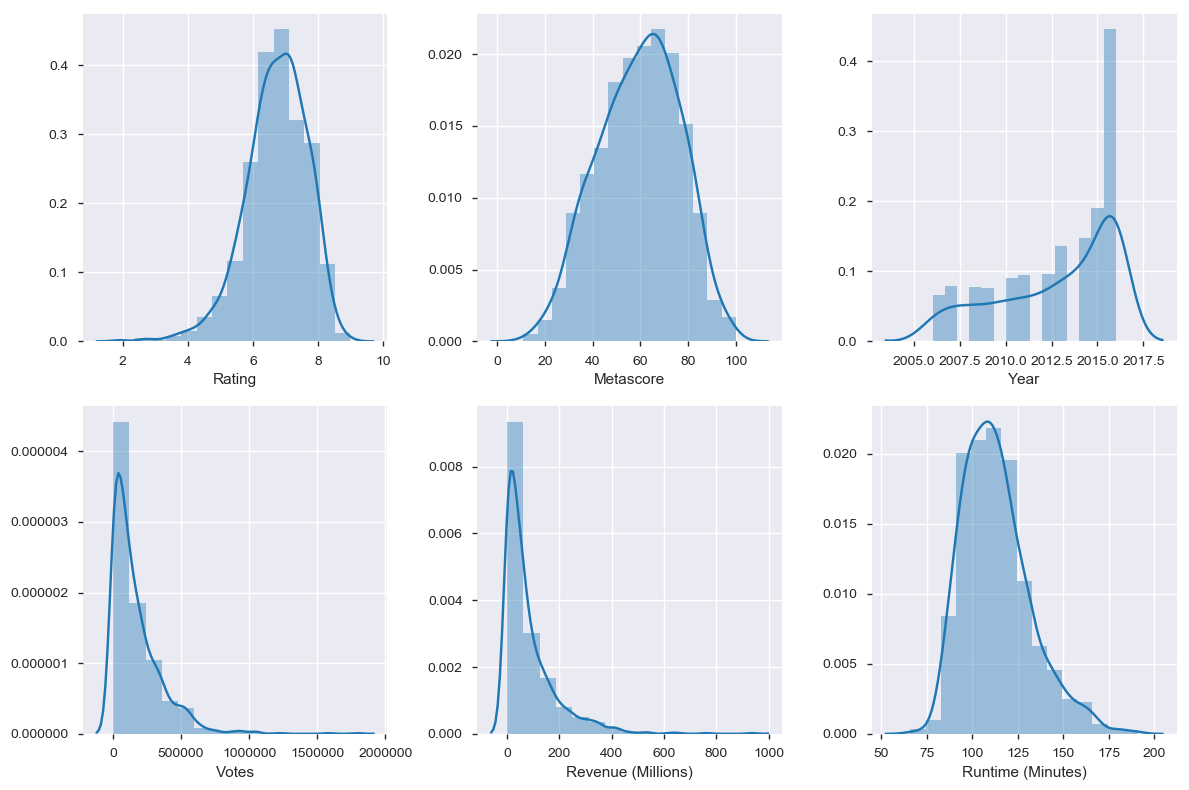

In [33]:
fig, axes = plt.subplots(2, 3)
fig.set_size_inches(12, 8)

m1 = sns.distplot(movie_data.Rating, bins=15, ax=axes[0, 0])
m2 = sns.distplot(movie_data.Metascore, bins=15, ax=axes[0, 1])
m3 = sns.distplot(movie_data.Year, bins=15, ax=axes[0, 2])
m4 = sns.distplot(movie_data.Votes, bins=15, ax=axes[1, 0])
m5 = sns.distplot(movie_data["Revenue (Millions)"], bins=15, ax=axes[1, 1])
m6 = sns.distplot(movie_data["Runtime (Minutes)"] ,bins=15, ax=axes[1, 2])

plt.tight_layout()

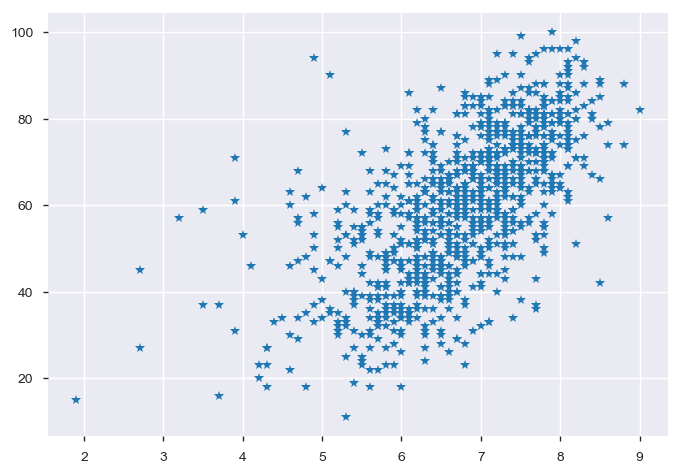

In [34]:
plt.plot(movie_data.Rating,movie_data.Metascore,'*')

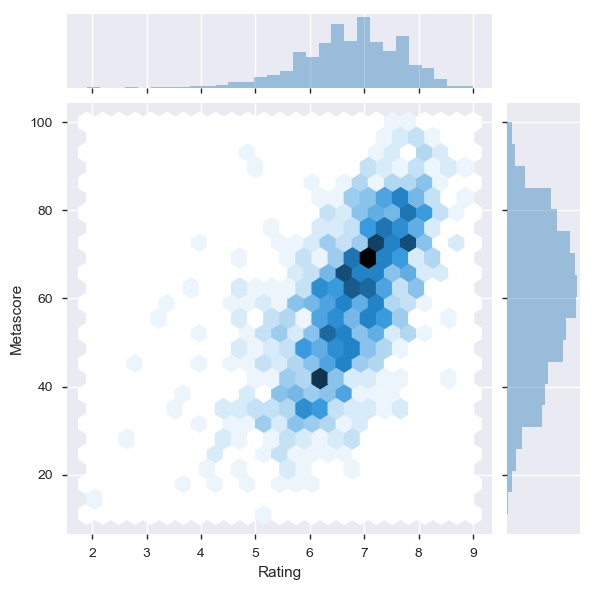

In [35]:
sns.jointplot(x="Rating",y="Metascore",data=movie_data,kind='hex')

#### Here we can see that these two columns have positive linear relation. So they both mostly rate movies similar.
Majority of movies have rating between 6 to 8 and Metascore data is also more concentrated between 40 to 80

#### Is the rating of a movie based on Voting ?

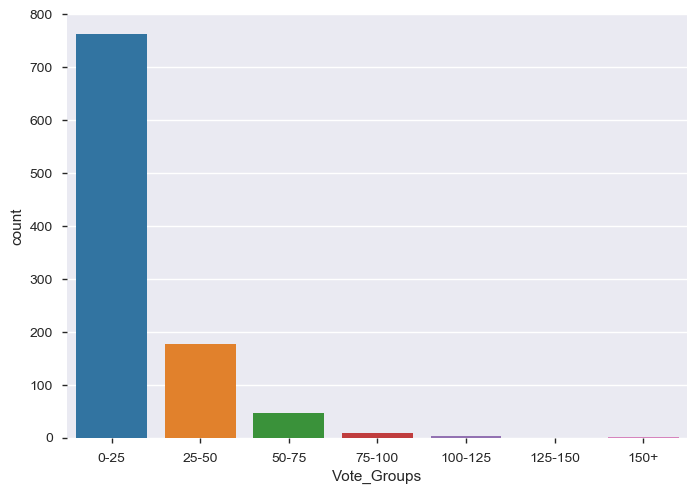

In [36]:
sns.countplot(x=movie_data["Vote_Groups"],data=movie_data)

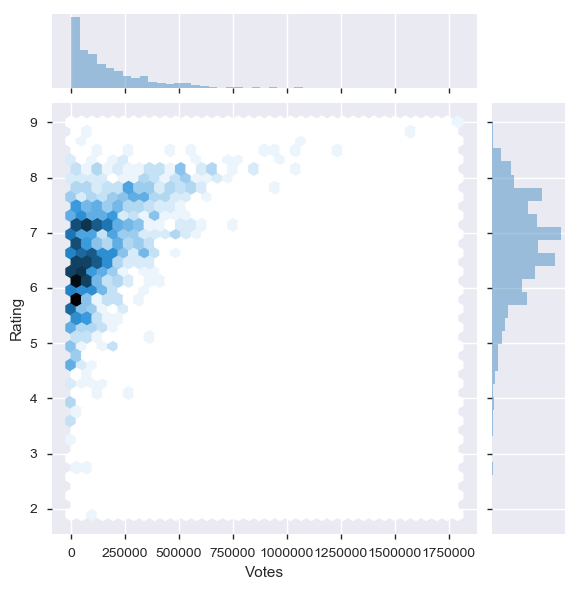

In [37]:
sns.jointplot(x="Votes",y="Rating",data=movie_data,kind='hex')

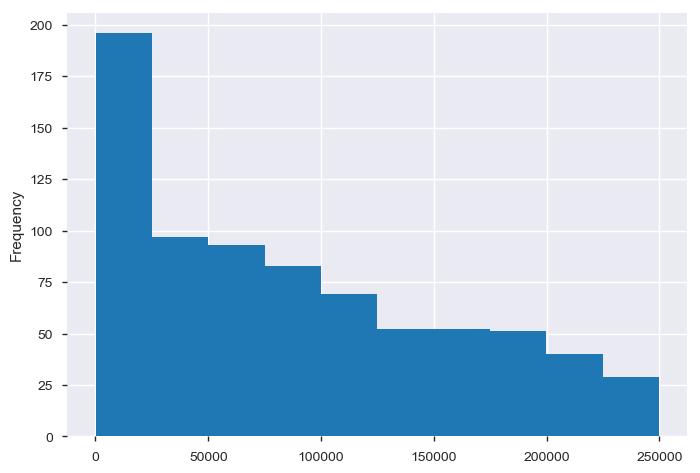

In [38]:
movie_data[movie_data.Votes < 250000]["Votes"].plot.hist()

In [39]:
movie_data.groupby(["Year","Revenue_Group"]).count()

Rank  Title  Genre  Director  Actors  Runtime (Minutes)  \
Year Revenue_Group                                                             
2006 0-200           36.0   36.0   36.0      36.0    36.0               36.0   
     200-400          5.0    5.0    5.0       5.0     5.0                5.0   
     400-600          1.0    1.0    1.0       1.0     1.0                1.0   
     600-800          NaN    NaN    NaN       NaN     NaN                NaN   
     800+             NaN    NaN    NaN       NaN     NaN                NaN   
2007 0-200           42.0   42.0   42.0      42.0    42.0               42.0   
     200-400          7.0    7.0    7.0       7.0     7.0                7.0   
     400-600          NaN    NaN    NaN       NaN     NaN                NaN   
     600-800          NaN    NaN    NaN       NaN     NaN                NaN   
     800+             NaN    NaN    NaN       NaN     NaN                NaN   
2008 0-200           45.0   45.0   45.0      45.0    45.0               45.0   
     200-400          5.0    5.0    5.0       5.0     5.0                5.0   
     400-600          1.0    1.0    1.0       1.0     1.0                1.0   
     600-800          NaN    NaN    NaN       NaN     NaN                NaN   
     800+             NaN    NaN    NaN       NaN     NaN                NaN   
2009 0-200           39.0   39.0   39.0      39.0    39.0               39.0   
     200-400          6.0    6.0    6.0       6.0     6.0                6.0   
     400-600          1.0    1.0    1.0       1.0     1.0                1.0   
     600-800          1.0    1.0    1.0       1.0     1.0                1.0   
     800+             NaN    NaN    NaN       NaN     NaN                NaN   
2010 0-200           48.0   48.0   48.0      48.0    48.0               48.0   
     200-400          8.0    8.0    8.0       8.0     8.0                8.0   
     400-600          1.0    1.0    1.0       1.0     1.0                1.0   
     600-800          NaN    NaN    NaN       NaN     NaN                NaN   
     800+             NaN    NaN    NaN       NaN     NaN                NaN   
2011 0-200           56.0   56.0   56.0      56.0    56.0               56.0   
     200-400          6.0    6.0    6.0       6.0     6.0                6.0   
     400-600          NaN    NaN    NaN       NaN     NaN                NaN   
     600-800          NaN    NaN    NaN       NaN     NaN                NaN   
     800+             NaN    NaN    NaN       NaN     NaN                NaN   
2012 0-200           55.0   55.0   55.0      55.0    55.0               55.0   
     200-400          6.0    6.0    6.0       6.0     6.0                6.0   
     400-600          2.0    2.0    2.0       2.0     2.0                2.0   
     600-800          1.0    1.0    1.0       1.0     1.0                1.0   
     800+             NaN    NaN    NaN       NaN     NaN                NaN   
2013 0-200           75.0   75.0   75.0      75.0    75.0               75.0   
     200-400         10.0   10.0   10.0      10.0    10.0               10.0   
     400-600          3.0    3.0    3.0       3.0     3.0                3.0   
     600-800          NaN    NaN    NaN       NaN     NaN                NaN   
     800+             NaN    NaN    NaN       NaN     NaN                NaN   
2014 0-200           81.0   81.0   81.0      81.0    81.0               81.0   
     200-400         13.0   13.0   13.0      13.0    13.0               13.0   
     400-600          NaN    NaN    NaN       NaN     NaN                NaN   
     600-800          NaN    NaN    NaN       NaN     NaN                NaN   
     800+             NaN    NaN    NaN       NaN     NaN                NaN   
2015 0-200          103.0  103.0  103.0     103.0   103.0              103.0   
     200-400          7.0    7.0    7.0       7.0     7.0                7.0   
     400-600          1.0    1.0    1.0       1.0     1.0                1.0   
     600-800         

#### Most of the movies have received voting between < 250000 , however Rating for the highly voted movie is also good.
So we can say that movie that have received good amount of Voting , have also received a good Rating

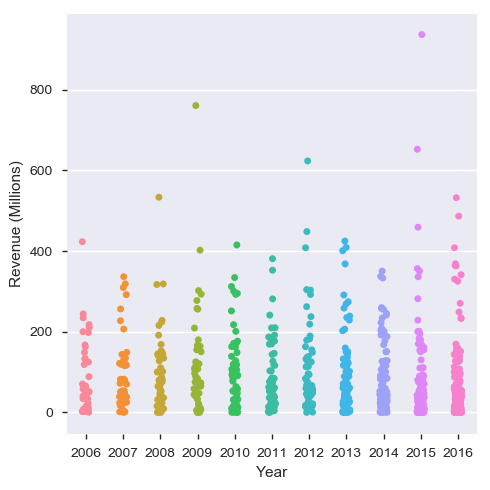

In [40]:
sns.catplot("Year","Revenue (Millions)",data=movie_data)

#### Year 2009, 2012 and 2015 had released highest revenue generating movies.

In [41]:
print(movie_data.groupby("Year").count())
movie_data.groupby(["Year"]).mean().sort_values("Revenue (Millions)",ascending =False)

      Rank  Title  Genre  Director  Actors  Runtime (Minutes)  Rating  Votes  \
Year                                                                           
2006    44     44     44        44      44                 44      44     44   
2007    53     53     53        53      53                 53      53     53   
2008    52     52     52        52      52                 52      52     52   
2009    51     51     51        51      51                 51      51     51   
2010    60     60     60        60      60                 60      60     60   
2011    63     63     63        63      63                 63      63     63   
2012    64     64     64        64      64                 64      64     64   
2013    91     91     91        91      91                 91      91     91   
2014    98     98     98        98      98                 98      98     98   
2015   127    127    127       127     127                127     127    127   
2016   297    297    297       297     2

,Rank,Runtime (Minutes),Rating,Votes,Revenue (Millions),Metascore,Avg_Rating
Year,,,,,,,
2009,586.823529,116.117647,6.960784,255780.647059,112.601277,57.764706,6.368627
2012,532.875000,119.109375,6.925000,285226.093750,107.973281,61.312500,6.528125
2010,587.316667,111.133333,6.826667,252782.316667,105.081579,59.600000,6.393333
2008,625.634615,110.826923,6.784615,275505.384615,99.082745,58.653846,6.325000
2007,576.584906,121.622642,7.133962,244331.037736,87.882245,65.433962,6.838679
2011,589.571429,114.603175,6.838095,240790.301587,87.612258,61.587302,6.498413
2013,556.230769,116.065934,6.812088,219049.648352,87.121818,59.065934,6.359341
2006,588.500000,120.840909,7.125000,269289.954545,86.296667,64.704545,6.797727
2014,512.979592,114.489796,6.837755,203930.224490,85.078723,57.857143,6.311735


#### Here we can see that 2009 and 2012 also have highest average Revenue generated, however year 2015 did not have overall good average revenue.
And 2016 had most number of movies but lowest avearge revenue.

In [42]:
movie_data.groupby("Genre1").mean().sort_values("Rating",ascending=False)
#movie_data.groupby("Genre2").mean().sort_values("Revenue (Millions)",ascending=False)

,Rank,Year,Runtime (Minutes),Rating,Votes,Revenue (Millions),Metascore,Avg_Rating
Genre1,,,,,,,,
Animation,487.040816,2012.734694,98.142857,7.324490,208159.428571,191.223404,70.836735,7.204082
Biography,512.984375,2013.437500,122.578125,7.318750,153060.718750,55.954500,68.937500,7.106250
Drama,512.635897,2012.861538,114.953846,6.954872,129445.128205,35.874487,64.779487,6.716410
Adventure,474.266667,2012.320000,119.013333,6.908000,225669.320000,113.453521,61.893333,6.548667
Mystery,571.307692,2012.384615,112.923077,6.876923,218672.000000,64.379091,56.384615,6.257692
Crime,530.577465,2012.605634,115.816901,6.807042,150124.957746,41.043519,60.887324,6.447887
Romance,410.000000,2013.500000,112.000000,6.600000,104572.000000,62.450000,68.000000,6.700000
Action,434.976109,2012.580205,117.354949,6.592491,235948.580205,122.093551,54.017065,5.997099
Comedy,567.760000,2012.880000,106.771429,6.493143,115640.188571,51.582244,56.154286,6.054286


##### If we take out the mean Rating on basis on Genre, then we can see which Genre has highest average Rating and average highest Revenue. 

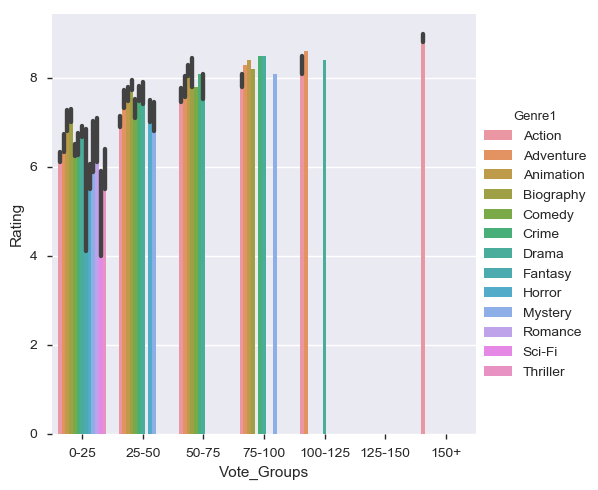

In [43]:
sns.catplot(x="Vote_Groups",y="Rating",hue="Genre1",data=movie_data,kind='bar')

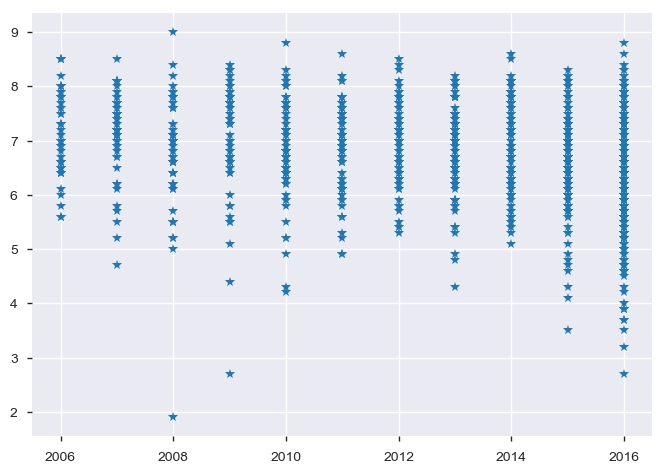

In [44]:
plt.plot(movie_data["Year"],movie_data["Rating"],'*')

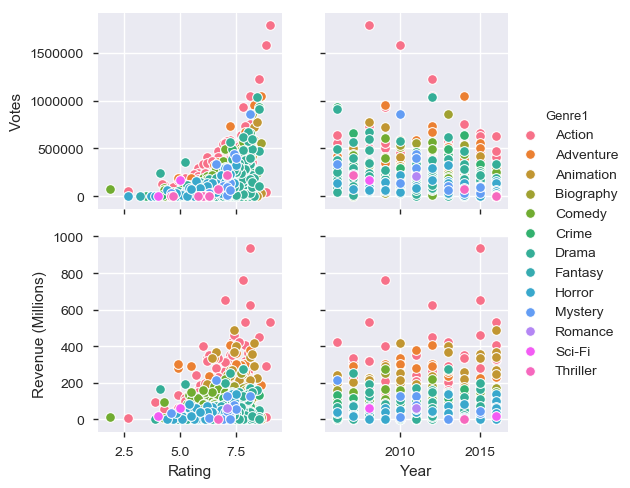

In [45]:
sns.pairplot(data=movie_data,x_vars=["Rating","Year"],y_vars=["Votes","Revenue (Millions)"],hue='Genre1')

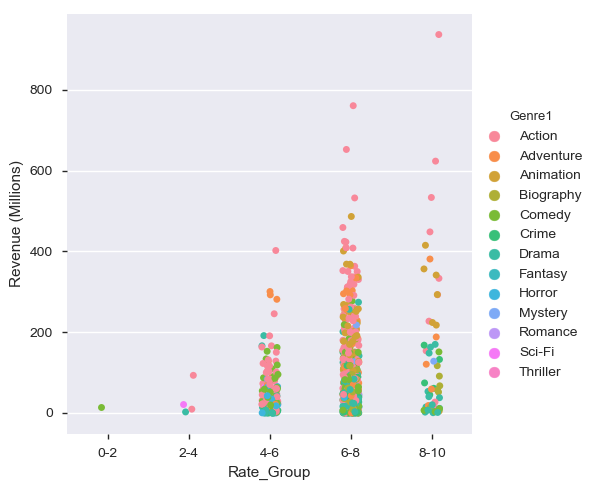

In [46]:
sns.catplot(x="Rate_Group",y="Revenue (Millions)",hue="Genre1",data=movie_data)

Considering, "Genre1" as the main genre of the movie from the multiple genre mentioned under "Genre" column, from above plots we see that "Action" genre is the highest revenue generator and most voted genre. 

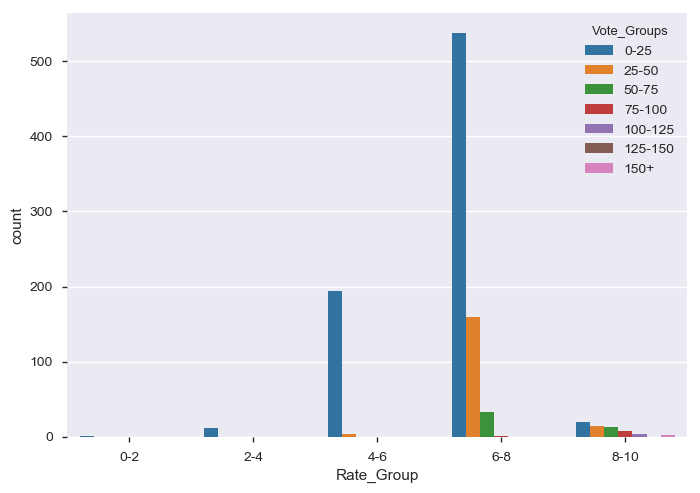

In [47]:
sns.countplot(movie_data["Rate_Group"],hue=movie_data["Vote_Groups"])

#### Here we can see some relation between Votes and Ratings, because on higher Rating group higher vote groups bar are also there. Whereas, on other Rating groups lower Vote group is shown.

F:\Softwares\Anaconda\lib\site-packages\numpy\core\_methods.py:140: RuntimeWarning: Degrees of freedom <= 0 for slice
  keepdims=keepdims)
F:\Softwares\Anaconda\lib\site-packages\numpy\core\_methods.py:132: RuntimeWarning: invalid value encountered in double_scalars
  ret = ret.dtype.type(ret / rcount)


Text(0.5, 1.0, 'Revenue distribution using FacetGrid')

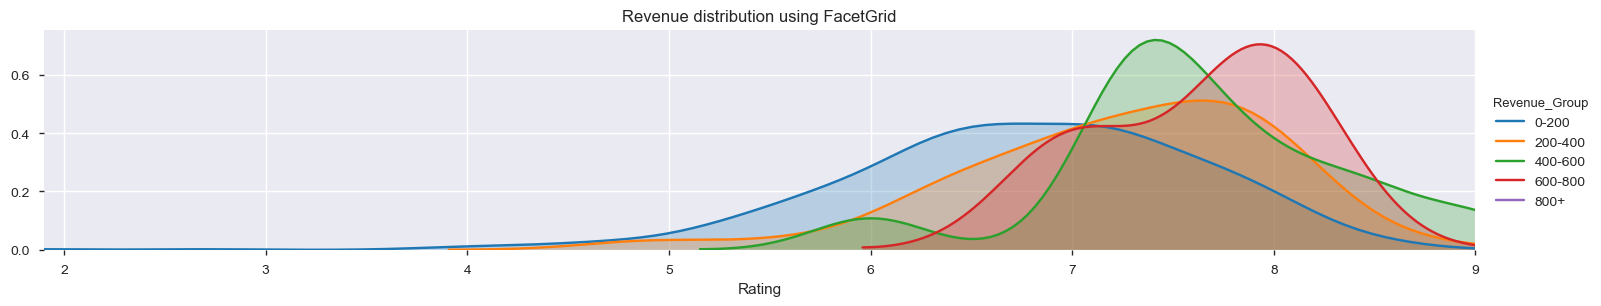

In [48]:
as_fig = sns.FacetGrid(movie_data,hue='Revenue_Group',aspect=5)

as_fig.map(sns.kdeplot,"Rating",shade=True)

max_ = movie_data["Rating"].max()
min_ = movie_data["Rating"].min()

as_fig.set(xlim=(min_,max_))

as_fig.add_legend()
plt.title('Revenue distribution using FacetGrid')

High Revenue generating movies are mostly rated in range 6.5 to 8.5

In [49]:
print(movie_data["Revenue (Millions)"].max())
movie_data[movie_data["Revenue (Millions)"]==936.63]

936.63


,Rank,Title,Genre,Director,Actors,Year,Runtime (Minutes),Rating,Votes,Revenue (Millions),Metascore,Genre1,Genre2,Genre3,Avg_Rating,Vote_Groups,Rate_Group,Revenue_Group
50,51,Star Wars: Episode VII - The Force Awakens,"Action,Adventure,Fantasy",J.J. Abrams,"Daisy Ridley, John Boyega, Oscar Isaac, Domhna...",2015,136,8.1,661608,936.63,81.0,Action,Adventure,Fantasy,8.1,50-75,8-10,800+


In [50]:
print(movie_data["Rating"].max())
movie_data[movie_data.Rating == 9.0]

9.0


,Rank,Title,Genre,Director,Actors,Year,Runtime (Minutes),Rating,Votes,Revenue (Millions),Metascore,Genre1,Genre2,Genre3,Avg_Rating,Vote_Groups,Rate_Group,Revenue_Group
54,55,The Dark Knight,"Action,Crime,Drama",Christopher Nolan,"Christian Bale, Heath Ledger, Aaron Eckhart,Mi...",2008,152,9.0,1791916,533.32,82.0,Action,Crime,Drama,8.6,150+,8-10,400-600


In [51]:
print(movie_data["Metascore"].max())
movie_data[movie_data.Metascore ==100]

100.0


,Rank,Title,Genre,Director,Actors,Year,Runtime (Minutes),Rating,Votes,Revenue (Millions),Metascore,Genre1,Genre2,Genre3,Avg_Rating,Vote_Groups,Rate_Group,Revenue_Group
656,657,Boyhood,Drama,Richard Linklater,"Ellar Coltrane, Patricia Arquette, Ethan Hawke...",2014,165,7.9,286722,25.36,100.0,Drama,Drama,Drama,8.95,25-50,6-8,0-200


In [52]:
print(movie_data.Votes.max())
movie_data[movie_data.Votes==1791916]

1791916


,Rank,Title,Genre,Director,Actors,Year,Runtime (Minutes),Rating,Votes,Revenue (Millions),Metascore,Genre1,Genre2,Genre3,Avg_Rating,Vote_Groups,Rate_Group,Revenue_Group
54,55,The Dark Knight,"Action,Crime,Drama",Christopher Nolan,"Christian Bale, Heath Ledger, Aaron Eckhart,Mi...",2008,152,9.0,1791916,533.32,82.0,Action,Crime,Drama,8.6,150+,8-10,400-600


#### Movie "The Dark Knight" is highest rated and voted movie with Metascore of 82 (which is not highest value but a good score). 
Movie __"Boyhood"__ had scored 100 in Metascore whereas Revenue is toward lower range.

The most revenue generating movie is __"Star Wars: Episode VII - The Force Awakens"__

The famous genre which has highest Rating, Voting and generated highest revenue belong to "Action" Genre.

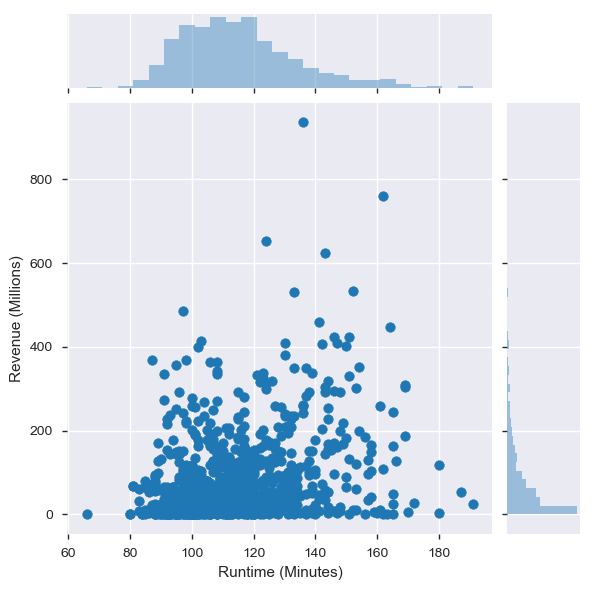

In [53]:
sns.jointplot(data=movie_data,x="Runtime (Minutes)",y="Revenue (Millions)")

Movies with runtime between 80 to 140 minuntes are the ones that are more revenue generating.

#### Most of the movies in our data set belong to year 2015 and 2016

### Does Runtime of the movie affect the revenue?

In [63]:
print(movie_data["Runtime (Minutes)"].max())
print(movie_data["Runtime (Minutes)"].min())

191
66


In [64]:
movie_data["Runtime_Range"] = pd.cut(movie_data["Runtime (Minutes)"],
                                     [65,85,105,125,145,165,185],
                                     labels =["65-85","85-105","105-125","125-145","145-165","165+"],include_lowest=True)

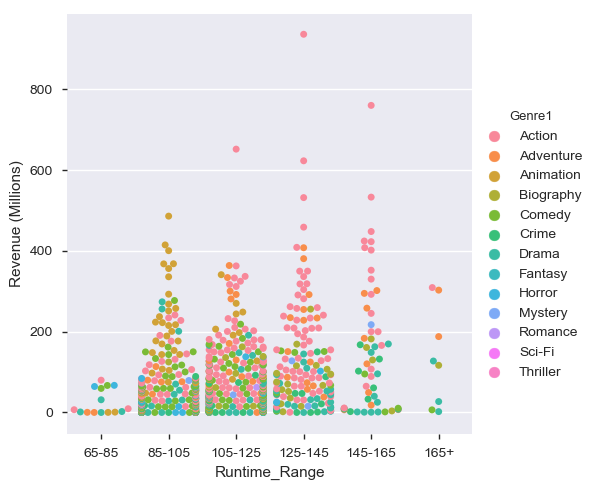

In [75]:
sns.catplot(x="Runtime_Range",y="Revenue (Millions)",kind="swarm",hue='Genre1',data=movie_data)

In [77]:
movie_data.groupby("Runtime_Range").mean().sort_values("Revenue (Millions)",ascending=False)

,Rank,Year,Runtime (Minutes),Rating,Votes,Revenue (Millions),Metascore,Avg_Rating
Runtime_Range,,,,,,,,
145-165,377.836364,2011.454545,154.400000,7.460000,375827.145455,160.639074,67.618182,7.110909
165+,319.000000,2010.444444,172.777778,7.811111,472249.444444,135.071250,67.444444,7.277778
125-145,403.967742,2012.554839,133.451613,7.127097,249052.258065,125.895833,64.812903,6.804194
105-125,494.634328,2012.651741,114.475124,6.788060,163936.937811,71.709071,59.263682,6.357214
85-105,569.379310,2013.181034,96.750000,6.403161,110844.747126,62.677102,55.758621,5.989511
65-85,563.034483,2014.413793,81.862069,5.703448,45044.000000,26.106000,59.068966,5.805172


In [79]:
movie_data[movie_data.Runtime_Range=="165+"]

,Rank,Title,Genre,Director,Actors,Year,Runtime (Minutes),Rating,Votes,Revenue (Millions),Metascore,Genre1,Genre2,Genre3,Avg_Rating,Vote_Groups,Rate_Group,Revenue_Group,Runtime_Range
36,37,Interstellar,"Adventure,Drama,Sci-Fi",Christopher Nolan,"Matthew McConaughey, Anne Hathaway, Jessica Ch...",2014,169,8.6,1047747,187.99,74.0,Adventure,Drama,Sci-Fi,8.00,100-125,8-10,0-200,165+
75,76,Pirates of the Caribbean: At World's End,"Action,Adventure,Fantasy",Gore Verbinski,"Johnny Depp, Orlando Bloom, Keira Knightley,Ge...",2007,169,7.1,498821,309.40,50.0,Action,Adventure,Fantasy,6.05,25-50,6-8,200-400,165+
82,83,The Wolf of Wall Street,"Biography,Comedy,Crime",Martin Scorsese,"Leonardo DiCaprio, Jonah Hill, Margot Robbie,M...",2013,180,8.2,865134,116.87,75.0,Biography,Comedy,Crime,7.85,75-100,8-10,0-200,165+
267,268,Cloud Atlas,"Drama,Sci-Fi",Tom Tykwer,"Tom Hanks, Halle Berry, Hugh Grant, Hugo Weaving",2012,172,7.5,298651,27.10,55.0,Drama,Sci-Fi,Sci-Fi,6.50,25-50,6-8,0-200,165+
271,272,The Hobbit: An Unexpected Journey,"Adventure,Fantasy",Peter Jackson,"Martin Freeman, Ian McKellen, Richard Armitage...",2012,169,7.9,668651,303.00,58.0,Adventure,Fantasy,Fantasy,6.85,50-75,6-8,200-400,165+
311,312,La vie d'Adèle,"Drama,Romance",Abdellatif Kechiche,"Léa Seydoux, Adèle Exarchopoulos, Salim Kechio...",2013,180,7.8,103150,2.20,88.0,Drama,Romance,Romance,8.30,0-25,6-8,0-200,165+
425,426,The Curious Case of Benjamin Button,"Drama,Fantasy,Romance",David Fincher,"Brad Pitt, Cate Blanchett, Tilda Swinton, Juli...",2008,166,7.8,485075,127.49,70.0,Drama,Fantasy,Romance,7.40,25-50,6-8,0-200,165+
430,431,3 Idiots,"Comedy,Drama",Rajkumar Hirani,"Aamir Khan, Madhavan, Mona Singh, Sharman Joshi",2009,170,8.4,238789,6.52,67.0,Comedy,Drama,Drama,7.55,0-25,8-10,0-200,165+
965,966,Inland Empire,"Drama,Mystery,Thriller",David Lynch,"Laura Dern, Jeremy Irons, Justin Theroux, Karo...",2006,180,7.0,44227,NaN,70.0,Drama,Mystery,Thriller,7.00,0-25,6-8,NaN,165+


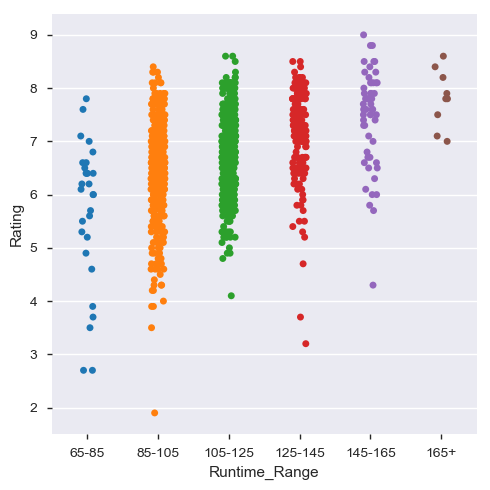

In [82]:
sns.catplot(x="Runtime_Range",y="Rating",data=movie_data)

Most of the movies lie between 90 to 140 minutes runtime.
Few movies have runtime of 165+ minutes but all have good rating and most of them have high revenue, due to which 165+ runtime range has second highest revenue generated.
Though movies with runtime between 65 to 100 minutes are poorly rated and dont have good profits

### Popular Genre combinations

In [83]:
movie_data["Genre"].plot.line()

TypeError: Empty 'DataFrame': no numeric data to plot

# Conclusion:

1. Viewer's and critics rating align with each other. However critics are more stirct in giving higher ratings than general Viewers
2. Most of the movies released belong to Genre __'Action','Drama','Comedy' and 'Adventure'__. Highest rated movie (__You Don't Mess with the Zohan__) belong to 'Action' genre. 
3. Lowest rated movie by critic is __'Nine Lives'__ Genre 'Comdey' and highest rated is __"Boyhood"__ genre 'Drama'. Lowest rated movie by user is __'Disaster'__ Genre 'Comedy' and highest rates by user is __"The Dark Knight"__ genre 'Action,Crime,Drama'
4. Director __"Ridley Scott"__ has 8 movies released over the years which is maximum number of movie by a director. 
Though movies by __"Christopher Nolan"__ has highest average rating by user.
And __"J.J. Abrams"__ movies has highest average revenue generated followed by __"Christopher Nolan"__
5. Most of the movies lie between 90 to 140 minutes runtime. Few movies have runtime of 165+ minutes but all have good rating and most of them have high revenue, due to which 165+ runtime range has second highest revenue generated. Though movies with runtime between 65 to 100 minutes are poorly rated and dont have good profits
6. The most revenue generating movie is __"Star Wars: Episode VII - The Force Awakens"__